In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intro. Just looking at the Dataset. Doesnt need cross-check

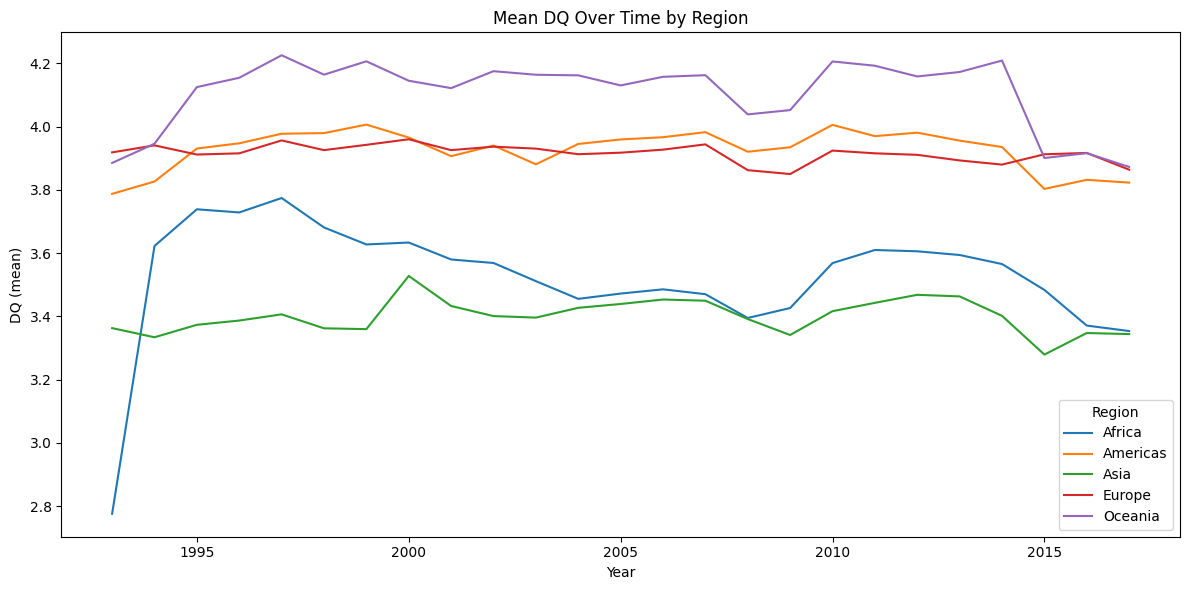

In [3]:
# Load the dataset (delimiter is ";")
df = pd.read_csv('DB_data_2020_all_data_Standardised.csv', delimiter=';')
    
# # Define country-to-region mapping (expand as needed for full coverage)
region_map = {
    # Europe
    'Albania': 'Europe',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Bosnia-Herzegovina': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Czechoslovakia': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'FR Yugoslavia': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Kosovo': 'Europe',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Netherlands': 'Europe',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',

    # Americas
    'Canada': 'Americas',
    'Chile': 'Americas',
    'Costa Rica': 'Americas',
    'Panama': 'Americas',
    'United States': 'Americas',
    'Uruguay': 'Americas',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',

    # Asia
    'Japan': 'Asia',
    'Taiwan': 'Asia',
    'Turkey': 'Asia',   # (Turkey sometimes Europe/Asia – assign as needed)

    # Africa
    'South Africa': 'Africa',
}
df['Region'] = df['Country'].map(region_map).fillna('Other')

# Group and aggregate mean DQ by region and year
grouped = df.groupby(['Region', 'Year'])['DQ'].mean().reset_index()
grouped = grouped.dropna(subset=['DQ'])

# Illustration: line plot by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Year', y='DQ', hue='Region')
plt.title('Mean DQ Over Time by Region')
plt.ylabel('DQ (mean)')
plt.xlabel('Year')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


Code for Question 2

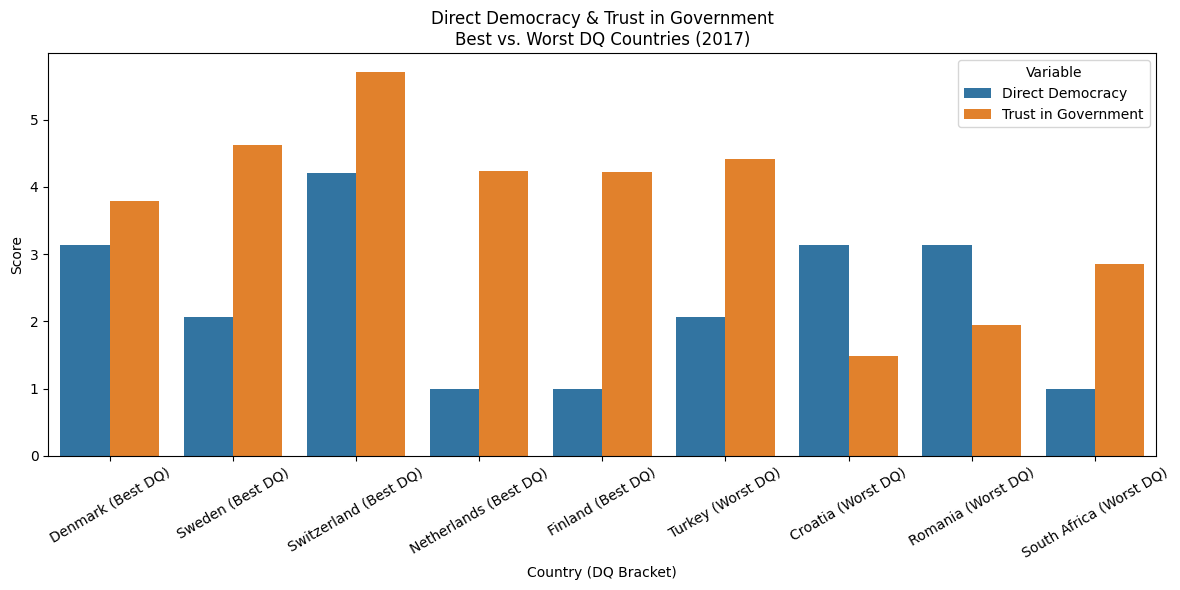

In [5]:
#### Question 2 for the highest/lowest ranking countries in the DQ
# # ist in ländern mit mehr direktdemokratischen instrumenten die zufreidenheit mit der demokratischen regierung höher?

# # Compute mean DQ per country, require countries with any non-null Dirdem & Confgov
valid_countries = df.dropna(subset=['Dirdem', 'Confgov']).groupby('Country').size().index.tolist()
mean_dq = df[df['Country'].isin(valid_countries)].groupby('Country')['DQ'].mean().dropna()

# Select best/worst 5
best = mean_dq.nlargest(5)
worst = mean_dq.nsmallest(5)
selected = list(best.index) + list(worst.index)
filtered = df[df['Country'].isin(selected)]

# Last available year
last_year = filtered['Year'].max()
filtered_last = filtered[filtered['Year'] == last_year]
filtered_last = filtered_last.dropna(subset=['Dirdem', 'Confgov'])

# Keep only countries with both variables present in last year
valid_in_last_year = filtered_last['Country'].unique()
country_order = [c for c in (list(best.index) + list(worst.index)) if c in valid_in_last_year]
filtered_last = filtered_last[filtered_last['Country'].isin(country_order)]

def dq_label(country):
    if country in best.index:
        return 'Best DQ'
    elif country in worst.index:
        return 'Worst DQ'
    else:
        return ''

filtered_last['DQ_bracket'] = filtered_last['Country'].apply(dq_label)

# Prepare for barplot with renamed variables
melted = filtered_last.melt(id_vars=['Country', 'DQ_bracket'], 
                           value_vars=['Dirdem', 'Confgov'], 
                           var_name='Variable', value_name='Score')
melted['Variable'] = melted['Variable'].map({'Dirdem': 'Direct Democracy', 'Confgov': 'Trust in Government'})
melted['Bracketed Country'] = melted.apply(lambda row: f"{row['Country']} ({row['DQ_bracket']})", axis=1)

# Final plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted,
    x='Bracketed Country',
    y='Score',
    hue='Variable',
    order=[f"{c} (Best DQ)" for c in best.index if c in valid_in_last_year] + [f"{c} (Worst DQ)" for c in worst.index if c in valid_in_last_year]
)
plt.title(f'Direct Democracy & Trust in Government\nBest vs. Worst DQ Countries ({last_year})')
plt.ylabel('Score')
plt.xlabel('Country (DQ Bracket)')
plt.xticks(rotation=30)
plt.legend(title='Variable')
plt.tight_layout()
plt.show()